<a href="https://colab.research.google.com/github/yopiazani02/pneumoniaVsCovid19/blob/master/Pneumonia_vs_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.kaggle.com/muhammadmasdar/pneumonia-virus-vs-covid19

Pneumonia (virus) vs COVID-19

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print(len(os.listdir('/content/drive/My Drive/Bangkit/Final Project/Pneumonia_and_COVID19/TRAIN/COVID-19')))
print(len(os.listdir('/content/drive/My Drive/Bangkit/Final Project/Pneumonia_and_COVID19/TRAIN/PNEUMONIA')))

59
1345


In [ ]:
base_dir = '/content/drive/My Drive/Bangkit/Final Project/Pneumonia_and_COVID19'

train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

# Directory with our training pictures
train_cov_dir = os.path.join(train_dir, 'COVID-19')
train_pneu_dir = os.path.join(train_dir, 'PNEUMONIA')

# Directory with our test pictures
test_cov_dir = os.path.join(test_dir , 'COVID-19')
test_pneu_dir = os.path.join(test_dir , 'PNEUMONIA')

In [ ]:
train_cov_fnames = os.listdir( train_cov_dir )
train_pneu_fnames = os.listdir( train_pneu_dir )

print(train_cov_fnames[:10])
print(train_pneu_fnames[:10])

['covid (1).jpeg', 'covid (10).jpg', 'covid (1).png', 'covid (10).png', 'covid (11).jpeg', 'covid (11).jpg', 'covid (11).png', 'covid (12).jpeg', 'covid (12).jpg', 'covid (13).jpeg']
['person446_virus_920.jpeg', 'person479_virus_978.jpeg', 'person440_virus_893.jpeg', 'person367_virus_747.jpeg', 'person409_virus_820.jpeg', 'person441_virus_894.jpeg', 'person370_virus_752.jpeg', 'person486_virus_990.jpeg', 'person432_virus_881.jpeg', 'person442_virus_903.jpeg']


In [ ]:
print('total training Covid-19 images :', len(os.listdir(      train_cov_dir ) ))
print('total training Pneumonia images :', len(os.listdir(      train_pneu_dir ) ))

print('total validation Covid-19 images :', len(os.listdir( test_cov_dir ) ))
print('total validation Pneumonia images :', len(os.listdir( test_pneu_dir ) ))

total training Covid-19 images : 59
total training Pneumonia images : 1345
total validation Covid-19 images : 11
total validation Pneumonia images : 148


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

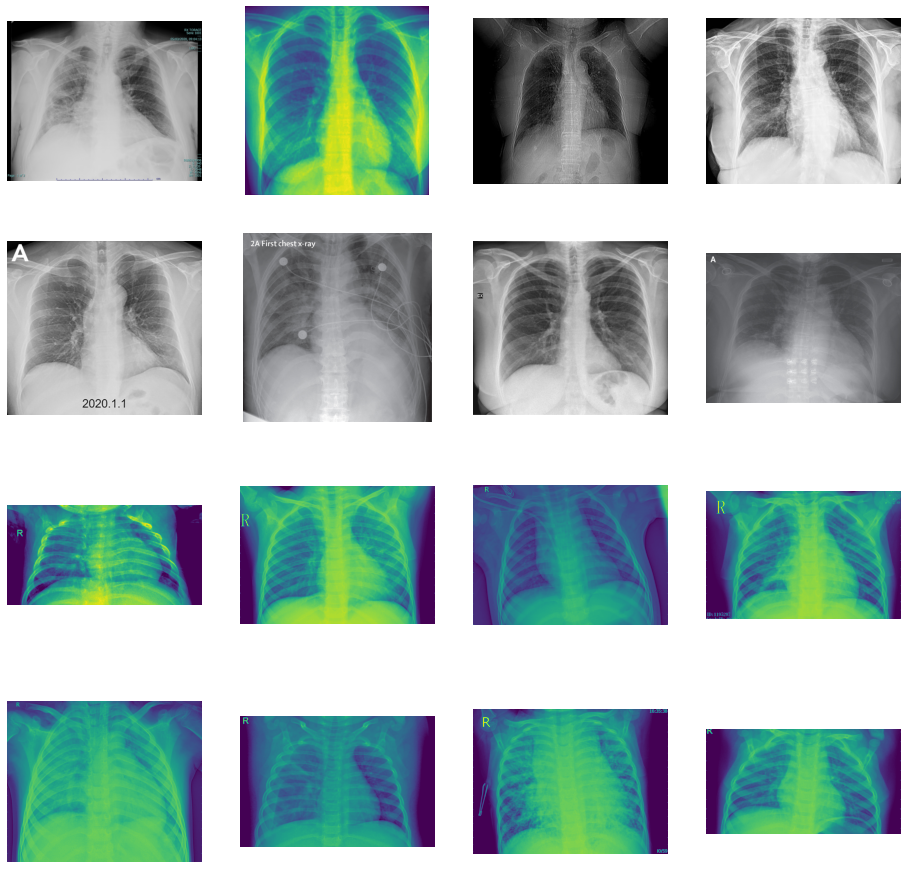

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cov_pix = [os.path.join(train_cov_dir, fname) 
                for fname in train_cov_fnames[ pic_index-8:pic_index] 
               ]

next_pneu_pix = [os.path.join(train_pneu_dir, fname) 
                for fname in train_pneu_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cov_pix+next_pneu_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1404 images belonging to 3 classes.
Found 159 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=10,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15
10/10 - 66s - loss: -1.2207e+04 - accuracy: 0.0543 - val_loss: -7.7209e+04 - val_accuracy: 0.0500
Epoch 2/15
10/10 - 50s - loss: -4.1483e+05 - accuracy: 0.0400 - val_loss: -1.1132e+06 - val_accuracy: 0.1000
Epoch 3/15
